<a href="https://colab.research.google.com/github/vladimiralencar/Alunos-UEPB-TopicosEspeciaisEmBancoDeDados/blob/master/deeplearning/Keras_MNIST_Outubro_2021_v02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Keras - Reconhecimento de Dígitos (MNIST)

In [ ]:
!nvidia-smi

Thu Oct 14 11:00:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
%matplotlib inline

## Carregando arquivo de dígitos

In [ ]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


Let's look at some examples of the training data

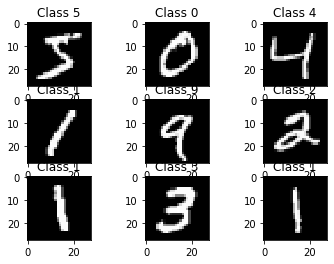

In [ ]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

## Formatar e  Colocar os dados em Escala 
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Modify the target matrices to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [ ]:
# codificação ONE-HOT ENCODING
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [ ]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# Construindo a Rede Neural
Build the neural-network. Here we'll do a simple 3 layer fully connected network.
<img src="https://raw.githubusercontent.com/vladimiralencar/Alunos-UEPB-TopicosEspeciaisEmBancoDeDados/master/deeplearning/data/figure.png" />

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
#model.add(Dropout(0.3))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
#model.add(Dropout(0.3))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

## Compile the model


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________

## Train the model!
This is the fun part: you can feed the training data loaded in earlier into this model and it will learn to classify digits

In [ ]:
%%time
model.fit(X_train, Y_train,
          batch_size=256, epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
235/235 [==============================] - 2s 5ms/step - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.0935 - val_accuracy: 0.9832
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.1131 - val_accuracy: 0.9814
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.1226 - val_accuracy: 0.9829
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.1188 - val_accuracy: 0.9841
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.1332 - val_accuracy: 0.9830
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.1263 - val_accuracy: 0.9842
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.1409 - val_accuracy: 0.9827
Epoch 

## Finally, evaluate its performance

In [ ]:
#loss = model.evaluate(X_test, Y_test,verbose=0)
#print('Acurácia de teste:', 1 - loss)

_, acc = model.evaluate(X_test, Y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 98.440


# CNN Model

![image](https://lh4.googleusercontent.com/ojMXAE77tiVVF3RSqK1lldysJx5OzBJdE5ng_0w7GpHYWl9GR9jjBN0p56UFW3dM3gEdS-0oTOw0IjORJXVImFvcXdD-EnFibJl06gxMN_kYTeOyfmanNEvXK59CYzt2t_3DifPG)

In [ ]:
# define cnn model
model = Sequential() # 32
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1) ) ) #
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100, activation='relu',  kernel_initializer='he_uniform')) #))
model.add(Dense(10, activation='softmax'))

# compile model
#opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               1843300   
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [ ]:
# reshape dataset to have a single channel
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

# one hot encode target values
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [ ]:
%%time
history = model.fit(X_train, Y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(X_test, Y_test), 
                    verbose=1)

Epoch 1/20
118/118 [==============================] - 20s 37ms/step - loss: 0.2113 - accuracy: 0.9352 - val_loss: 0.0551 - val_accuracy: 0.9825
Epoch 2/20
118/118 [==============================] - 4s 33ms/step - loss: 0.0486 - accuracy: 0.9852 - val_loss: 0.0379 - val_accuracy: 0.9882
Epoch 3/20
118/118 [==============================] - 4s 33ms/step - loss: 0.0316 - accuracy: 0.9901 - val_loss: 0.0355 - val_accuracy: 0.9894
Epoch 4/20
118/118 [==============================] - 4s 33ms/step - loss: 0.0201 - accuracy: 0.9938 - val_loss: 0.0399 - val_accuracy: 0.9875
Epoch 5/20
118/118 [==============================] - 4s 33ms/step - loss: 0.0157 - accuracy: 0.9948 - val_loss: 0.0391 - val_accuracy: 0.9890
Epoch 6/20
118/118 [==============================] - 4s 33ms/step - loss: 0.0134 - accuracy: 0.9953 - val_loss: 0.0315 - val_accuracy: 0.9904
Epoch 7/20
118/118 [==============================] - 4s 33ms/step - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.0331 - val_accuracy: 0.990

# Avaliando meu Modelo

In [ ]:
_, acc = model.evaluate(X_test, Y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 99.180


# Resultados - Métricas Pesos Sinápticos e Hiperparâmetros

In [ ]:
history.__dict__

{'_chief_worker_only': None,
 '_supports_tf_logs': False,
 'epoch': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19],
 'history': {'accuracy': [0.9352333545684814,
   0.9851999878883362,
   0.9901000261306763,
   0.9937833547592163,
   0.9947999715805054,
   0.9953166842460632,
   0.997083306312561,
   0.9977999925613403,
   0.9974666833877563,
   0.9976833462715149,
   0.99836665391922,
   0.9981333613395691,
   0.9977499842643738,
   0.9988166689872742,
   0.9985833168029785,
   0.9986166954040527,
   0.9975833296775818,
   0.9986000061035156,
   0.998533308506012,
   0.9988333582878113],
  'loss': [0.21129210293293,
   0.04858294501900673,
   0.03164193034172058,
   0.020079512149095535,
   0.015684988349676132,
   0.013439600355923176,
   0.009093165397644043,
   0.006993759889155626,
   0.007641856092959642,
   0.006784080062061548,
   0.0048000686801970005,
   0.005467776209115982,
   0.006074777338653803,
   0.003794127

In [ ]:
acc = history.history['accuracy']
acc

[0.9352333545684814,
 0.9851999878883362,
 0.9901000261306763,
 0.9937833547592163,
 0.9947999715805054,
 0.9953166842460632,
 0.997083306312561,
 0.9977999925613403,
 0.9974666833877563,
 0.9976833462715149,
 0.99836665391922,
 0.9981333613395691,
 0.9977499842643738,
 0.9988166689872742,
 0.9985833168029785,
 0.9986166954040527,
 0.9975833296775818,
 0.9986000061035156,
 0.998533308506012,
 0.9988333582878113]

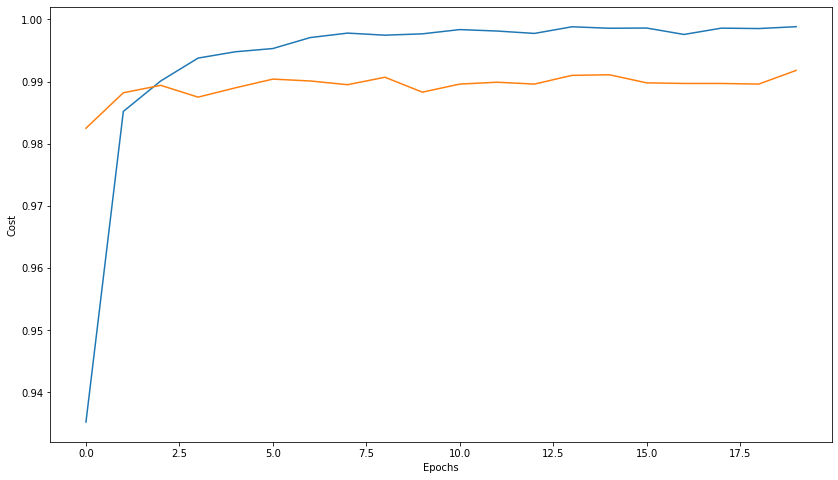

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [14,8]

acc = history.history['accuracy']

plt.plot(history.epoch, acc)
plt.plot(history.epoch, history.history['val_accuracy'] )
plt.ylabel('Cost')
plt.xlabel('Epochs')
#plt.savefig('images/12_07.png', dpi=300)
plt.show()

## Plotando algumas predições erradas do conjunto de teste

In [ ]:
np.set_printoptions(suppress=True, precision=30)

predict_x = model.predict(X_test)[0]
print(predict_x)

[0.000000000000009219011        0.00000000000000031563894
 0.0000000000065266525          0.000000000041444032
 0.0000000000000009049975       0.00000000000001578364
 0.0000000000000000000009619115 1.
 0.0000000000000029782824       0.00000000006719887           ]


In [ ]:
predict_x = model.predict (X_test)[0]
classes_x= np.argmax(predict_x)
classes_x

7

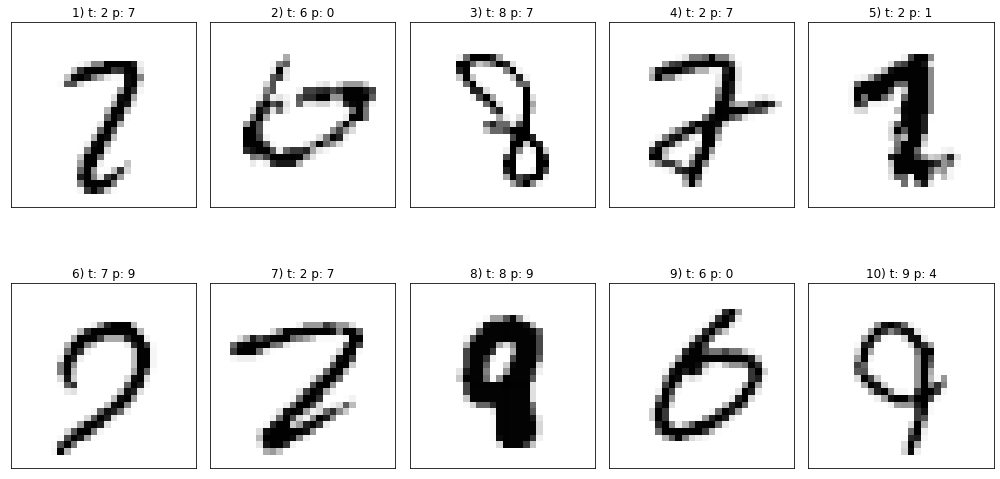

In [ ]:
# classificações incorretas
predict_x = model.predict(X_test)
y_test_pred = np.argmax(predict_x, axis=1)

#y_test_pred = np_utils.to_categorical(y_test_pred, nb_classes)

miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]


#miscl_img = X_test[correct_indices]
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

# Plotando algumas predições Corretas do conjunto de teste

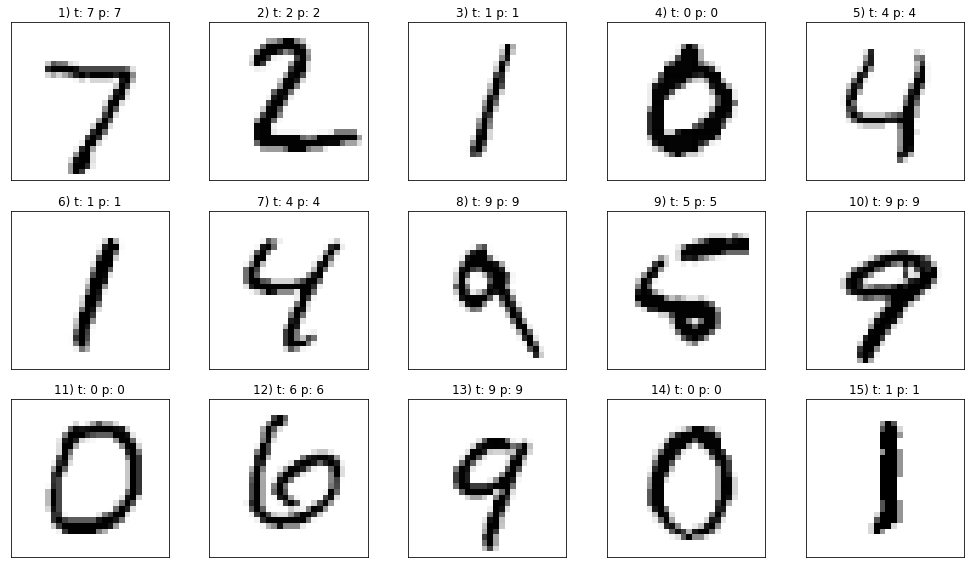

In [ ]:
# classificações corretas
miscl_img = X_test[y_test == y_test_pred][:25]
correct_lab = y_test[y_test == y_test_pred][:25]
miscl_lab = y_test_pred[y_test == y_test_pred][:25]


#miscl_img = X_test[correct_indices]
fig, ax = plt.subplots(nrows=3, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(15):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

# Salvando o modelo

In [ ]:
model.save('modelo.hdf5')
!ls -ilah *.hdf5

5242890 -rw-r--r-- 1 root root 23M Oct 14 11:32 modelo.hdf5


# Carregando o modelo Salvo

In [ ]:
loaded_model = load_model('modelo.hdf5')
_, acc = model.evaluate(X_test, Y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 99.180


# Download do modelo

In [ ]:
%%time
from google.colab import files
files.download('modelo.hdf5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>